In [5]:
!pip3 install --upgrade --user numexpr bottleneck pandas openpyxl


In [368]:
import pandas as pd

df = pd.read_csv('curricula_backup.tsv', sep='\t')
df

,author,title,comment,curriculum,id,year,grade,priority
0,Андреев Л.Н.,Жили-были,NaN,19 ИРЛ 2 ст,1,1919,9,NaN
1,Андреев Л.Н.,Иуда,NaN,19 ИРЛ 2 ст,1,1919,9,NaN
2,Андреев Л.Н.,Рассказ о семи повешенных,NaN,19 ИРЛ 2 ст,1,1919,9,*
3,Бальмонт К.Д.,NaN,NaN,19 ИРЛ 2 ст,1,1919,9,*
4,Брюсов В.Я.,NaN,NaN,19 ИРЛ 2 ст,1,1919,9,*
...,...,...,...,...,...,...,...,...
10301,Шиллер Ф.,Разбойники,NaN,91 ПСОУЗ,50,1991,9,NaN
10302,Эсхил,Прометей прикованный,NaN,91 ПСОУЗ,50,1991,9,NaN
10303,Достоевский Ф.М.,Преступление и наказание,NaN,91 ПСОУЗ,50,1991,10,NaN
10304,Куприн А.И.,Гранатовый браслет,NaN,91 ПСОУЗ,50,1991,11,*


1938 и 1939 гг. 
1962 и 1963 гг.   
1966 и 1967 гг.
1967 и 1972 гг.

In [369]:
df.duplicated().sum()

11

In [370]:
df.drop_duplicates(inplace = True)

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10295 entries, 0 to 10305
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   author      10034 non-null  object
 1   title       8752 non-null   object
 2   comment     443 non-null    object
 3   curriculum  10295 non-null  object
 4   id          10295 non-null  int64 
 5   year        10295 non-null  object
 6   grade       10295 non-null  int64 
 7   priority    5658 non-null   object
dtypes: int64(2), object(6)
memory usage: 723.9+ KB


In [372]:
years = ['1937-38', '1939', '1962', '1963', '1966', '1967', '1967', '1972']
df[df['year'].isin(years)].shape[0]/df.shape[0]

0.09305488101019913

In [373]:
df['year'].value_counts()

year
1991       519
1940       376
1939       375
1933       341
1982       282
1984       282
1983       281
1988       278
1987       278
1986       278
1985       278
1949       276
1950       273
1980       269
1981       265
1979       265
1975       264
1974       264
1978       264
1977       264
1976       264
1951       263
1941       263
1942       231
1934       214
1946       204
1948       200
1922       191
1973       188
1972       187
1944       187
1947       185
1919       160
1932       122
1964       116
1956       114
1963       113
1954       109
1965       107
1938       107
1966       104
1960       103
1959       103
1958       103
1957       103
1961       103
1967       102
1962        65
1937-38     12
Name: count, dtype: int64

удаленный датасет - df_del (10% удалено примерно)  
df - все годы

оставить только очищенный датасет
заолпнить пропуски имен и пропуски произведений

In [374]:
df_del = df.drop(df[df['year'].isin(years)].index)
df_del.year.value_counts()

year
1991    519
1940    376
1933    341
1984    282
1982    282
1983    281
1986    278
1985    278
1987    278
1988    278
1949    276
1950    273
1980    269
1981    265
1979    265
1974    264
1975    264
1976    264
1977    264
1978    264
1941    263
1951    263
1942    231
1934    214
1946    204
1948    200
1922    191
1973    188
1944    187
1947    185
1919    160
1932    122
1964    116
1956    114
1954    109
1965    107
1938    107
1961    103
1959    103
1958    103
1957    103
1960    103
Name: count, dtype: int64

In [375]:
df_del['title'] = df_del['title'].fillna('что-то')
df_del['author'] = df_del['author'].fillna('народ')

In [376]:
df_del.shape

(9337, 8)

In [377]:
df['year'] = df['year'].apply(lambda x: 1937 if x == '1937-38' else x)

In [378]:
df_del.year.value_counts()

year
1991    519
1940    376
1933    341
1984    282
1982    282
1983    281
1986    278
1985    278
1987    278
1988    278
1949    276
1950    273
1980    269
1981    265
1979    265
1974    264
1975    264
1976    264
1977    264
1978    264
1941    263
1951    263
1942    231
1934    214
1946    204
1948    200
1922    191
1973    188
1944    187
1947    185
1919    160
1932    122
1964    116
1956    114
1954    109
1965    107
1938    107
1961    103
1959    103
1958    103
1957    103
1960    103
Name: count, dtype: int64

In [379]:
import datetime as dt
df_del['year'] = pd.to_datetime(df_del['year'], format='%Y').dt.year
df['year'] = pd.to_datetime(df['year'], format='%Y').dt.year

In [35]:
df_del.to_csv('del_s4.csv')
df.to_csv('s4.csv')

In [59]:
df = pd.read_csv('s4.csv')
df_del = pd.read_csv('del_s4.csv')

In [36]:
df

,author,title,comment,curriculum,id,year,grade,priority
0,Андреев Л.Н.,Жили-были,NaN,19 ИРЛ 2 ст,1,1919,9,NaN
1,Андреев Л.Н.,Иуда,NaN,19 ИРЛ 2 ст,1,1919,9,NaN
2,Андреев Л.Н.,Рассказ о семи повешенных,NaN,19 ИРЛ 2 ст,1,1919,9,*
3,Бальмонт К.Д.,NaN,NaN,19 ИРЛ 2 ст,1,1919,9,*
4,Брюсов В.Я.,NaN,NaN,19 ИРЛ 2 ст,1,1919,9,*
...,...,...,...,...,...,...,...,...
10301,Шиллер Ф.,Разбойники,NaN,91 ПСОУЗ,50,1991,9,NaN
10302,Эсхил,Прометей прикованный,NaN,91 ПСОУЗ,50,1991,9,NaN
10303,Достоевский Ф.М.,Преступление и наказание,NaN,91 ПСОУЗ,50,1991,10,NaN
10304,Куприн А.И.,Гранатовый браслет,NaN,91 ПСОУЗ,50,1991,11,*


In [54]:
pd.set_option('display.max_rows', 25)

    СМОТРИМ КАК В РАЗНЫХ ДАТАСЕТАХ МЕНЯЕТСЯ ТОП-50

ПОСМОТЕРТЬ КАК ЧАСТО НАЗВАНИЯ НЕ СХОДЯТСЯ С НАЗВАНИЕМ ПРОГРАММЫ

In [397]:
df_del[df_del['author'] == 'Шиллер Ф.']

,author,title,comment,curriculum,id,year,grade,priority
471,Шиллер Ф.,Вильгельм Телль,NaN,32 ФЗС 5-7,3,1932,7,NaN
682,Шиллер Ф.,Коварство и любовь,NaN,33 ПСШ 8-10,5,1933,10,*
683,Шиллер Ф.,Разбойники,NaN,33 ПСШ 8-10,5,1933,10,*
684,Шиллер Ф.,Вильгельм Телль,NaN,33 ПСШ 8-10,5,1933,10,NaN
806,Шиллер Ф.,Вильгельм Телль,NaN,33 ПСШ ГС 5-8,4,1933,6,NaN
1023,Шиллер Ф.,Коварство и любовь,NaN,34 ПСШ 8-10,6,1934,10,*
1024,Шиллер Ф.,Разбойники,NaN,34 ПСШ 8-10,6,1934,10,*
1025,Шиллер Ф.,Вильгельм Телль,NaN,34 ПСШ 8-10,6,1934,10,NaN
1523,Шиллер Ф.,Поликратов перстень,NaN,39 ПСШ 8-10,9,1933,8,*
1894,Шиллер Ф.,Ивиковы журавли,NaN,40 ПСШ 8-10,10,1940,8,*


In [85]:
long = pd.DataFrame(df.drop_duplicates(['author', 'year'])['author'].value_counts()).reset_index()

In [86]:
long

,author,count
0,Толстой Л.Н.,49
1,Салтыков-Щедрин М.Е.,49
2,Горький М.,49
3,Маяковский В.В.,48
4,Тургенев И.С.,48
5,Чехов А.П.,48
6,Островский А.Н.,48
7,Некрасов Н.А.,48
8,Добролюбов Н.А.,47
9,Фадеев А.А.,46


In [87]:
short = pd.DataFrame(df_del.drop_duplicates(['author', 'year'])['author'].value_counts()).reset_index()

In [88]:
merged_df = long.join(short, how='outer', lsuffix='_long', rsuffix='_short')

In [89]:
merged_df

,author_long,count_long,author_short,count_short
0,Толстой Л.Н.,49,Лермонтов М.Ю.,42
1,Салтыков-Щедрин М.Е.,49,Гоголь Н.В.,42
2,Горький М.,49,Тургенев И.С.,42
3,Маяковский В.В.,48,Горький М.,42
4,Тургенев И.С.,48,Грибоедов А.С.,42
5,Чехов А.П.,48,Толстой Л.Н.,42
6,Островский А.Н.,48,Салтыков-Щедрин М.Е.,42
7,Некрасов Н.А.,48,Пушкин А.С.,42
8,Добролюбов Н.А.,47,Островский А.Н.,42
9,Фадеев А.А.,46,Некрасов Н.А.,42


In [67]:
pd.set_option('display.max_rows', 500)
pd.DataFrame(df_del.drop_duplicates(['author', 'year'])['author'].value_counts())

,count
author,
Лермонтов М.Ю.,42
Гоголь Н.В.,42
Тургенев И.С.,42
Горький М.,42
Грибоедов А.С.,42
Толстой Л.Н.,42
Салтыков-Щедрин М.Е.,42
Пушкин А.С.,42
Островский А.Н.,42


        СЧИТАЕМ ДОЛИ НЕСХОДЯЩИХСЯ ПРОИЗВЕДЕНИЙ

In [386]:
pivot_df1 = df_del.pivot_table(index='title', columns='year', values='id', aggfunc='count').reset_index()

In [387]:
pivot_df1 = pivot_df1[pivot_df1.title != 'стихотворения']
pivot_df1 = pivot_df1[pivot_df1.title != 'критика']

In [388]:
pivot_df1 = pivot_df1.set_index('title')

for i in pivot_df1.columns:
    pivot_df1[i] = pivot_df1[i].apply(lambda x: 1 if x > 0 else 0)
data = {} # делаем матрицу, а потом датафрейм с долей несходящихся диагнозов
for i in pivot_df1.columns:
    data[i] = []
    for j in pivot_df1.columns:
        data[i].append(((pivot_df1[i] - pivot_df1[j])**2).sum()/len(pivot_df1[1919]))
dataf1 = pd.DataFrame(data, index = pivot_df1.columns)

        СЧИТАЕМ ДОЛИ НЕСХОДЯЩИХСЯ АВТОРОВ

In [403]:
pivot_df = df_del.pivot_table(index='author', columns='year', values='title', aggfunc='count')
pivot_df

year,1919,1922,1932,1933,1934,1938,1940,1941,1942,1944,...,1980,1981,1982,1983,1984,1985,1986,1987,1988,1991
author,,,,,,,,,,,,,,,,,,,,,
Абашидзе И.В.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
Абрамов Ф.А.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
Аверченко А.Т.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
Авижюс Й.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
Адамович А.М.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN
Адамович Г.В.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Ажаев В.Н.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Айбек М.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
Айни С.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN


            почему 40-1 год выдается???

In [390]:
for i in pivot_df.columns:
    pivot_df[i] = pivot_df[i].apply(lambda x: 1 if x > 0 else 0)

In [402]:
data = {} # делаем матрицу, а потом датафрейм с долей несходящихся диагнозов
for i in pivot_df.columns:
    data[i] = []
    for j in pivot_df.columns:
        data[i].append(((pivot_df[i] - pivot_df[j])**2).sum()/len(pivot_df[1919]))
dataf = pd.DataFrame(data, index = pivot_df.columns)

### СМОТРЕТЬ СЮДА

In [407]:
pivot_df

year,1919,1922,1932,1933,1934,1938,1940,1941,1942,1944,...,1980,1981,1982,1983,1984,1985,1986,1987,1988,1991
author,,,,,,,,,,,,,,,,,,,,,
Абашидзе И.В.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
Абрамов Ф.А.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
Аверченко А.Т.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
Авижюс Й.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
Адамович А.М.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN
Адамович Г.В.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Ажаев В.Н.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Айбек М.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
Айни С.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN


In [408]:
df_del['autitle'] = df_del['author'] + ' ' + df_del['title']
df_del['autitle'] 

0                           Андреев Л.Н. Жили-были
1                                Андреев Л.Н. Иуда
2           Андреев Л.Н. Рассказ о семи повешенных
3                             Бальмонт К.Д. что-то
4                               Брюсов В.Я. что-то
                           ...                    
10301                         Шиллер Ф. Разбойники
10302                   Эсхил Прометей прикованный
10303    Достоевский Ф.М. Преступление и наказание
10304               Куприн А.И. Гранатовый браслет
10305                    Некрасов Н.А. Коробейники
Name: autitle, Length: 9337, dtype: object

In [ ]:
pivot_df_autt = df_del.pivot_table(index='autitle', columns='year', values='title', aggfunc='count')
pivot_df_autt

In [ ]:
# с количеством произведений, а не бинарной

data = {} 
for i in pivot_df.columns:
    data[i] = []
    for j in pivot_df.columns:
        data[i].append((abs(pivot_df[i] - pivot_df[j])).sum()/len(pivot_df[1919]))
dataf2 = pd.DataFrame(data, index = pivot_df.columns)
dataf2

In [405]:
# с количеством произведений, а не бинарной

data = {} 
for i in pivot_df.columns:
    data[i] = []
    for j in pivot_df.columns:
        data[i].append((abs(pivot_df[i] - pivot_df[j])).sum()/len(pivot_df[1919]))
dataf2 = pd.DataFrame(data, index = pivot_df.columns)
dataf2

,1919,1922,1932,1933,1934,1938,1940,1941,1942,1944,...,1980,1981,1982,1983,1984,1985,1986,1987,1988,1991
year,,,,,,,,,,,,,,,,,,,,,
1919,0.000000,0.175705,0.156182,0.236443,0.214751,0.186551,0.271150,0.273319,0.255965,0.171367,...,0.214751,0.212581,0.203905,0.203905,0.203905,0.208243,0.208243,0.208243,0.208243,0.273319
1922,0.175705,0.000000,0.088937,0.223427,0.212581,0.154013,0.368764,0.279826,0.258134,0.173536,...,0.212581,0.210412,0.227766,0.227766,0.227766,0.232104,0.232104,0.232104,0.232104,0.299349
1932,0.156182,0.088937,0.000000,0.180043,0.151844,0.075922,0.364425,0.227766,0.208243,0.145336,...,0.136659,0.132321,0.140998,0.140998,0.140998,0.134490,0.134490,0.134490,0.134490,0.164859
1933,0.236443,0.223427,0.180043,0.000000,0.229935,0.162690,0.405640,0.238612,0.249458,0.206074,...,0.323210,0.321041,0.312364,0.310195,0.312364,0.308026,0.308026,0.308026,0.308026,0.375271
1934,0.214751,0.212581,0.151844,0.229935,0.000000,0.132321,0.488069,0.340564,0.316703,0.260304,...,0.245119,0.245119,0.223427,0.223427,0.223427,0.223427,0.223427,0.223427,0.223427,0.386117
1938,0.186551,0.154013,0.075922,0.162690,0.132321,0.000000,0.392625,0.253796,0.225597,0.147505,...,0.117137,0.112798,0.106291,0.106291,0.106291,0.097614,0.097614,0.097614,0.097614,0.175705
1940,0.271150,0.368764,0.364425,0.405640,0.488069,0.392625,0.000000,0.206074,0.295011,0.251627,...,0.436009,0.436009,0.442516,0.442516,0.442516,0.444685,0.444685,0.444685,0.444685,0.386117
1941,0.273319,0.279826,0.227766,0.238612,0.340564,0.253796,0.206074,0.000000,0.117137,0.117137,...,0.262473,0.262473,0.260304,0.262473,0.260304,0.264642,0.264642,0.264642,0.264642,0.225597
1942,0.255965,0.258134,0.208243,0.249458,0.316703,0.225597,0.295011,0.117137,0.000000,0.062907,...,0.251627,0.255965,0.258134,0.260304,0.258134,0.262473,0.262473,0.262473,0.262473,0.210412


<AxesSubplot:title={'center':'Доля несходящихся авторов'}, ylabel='year'>

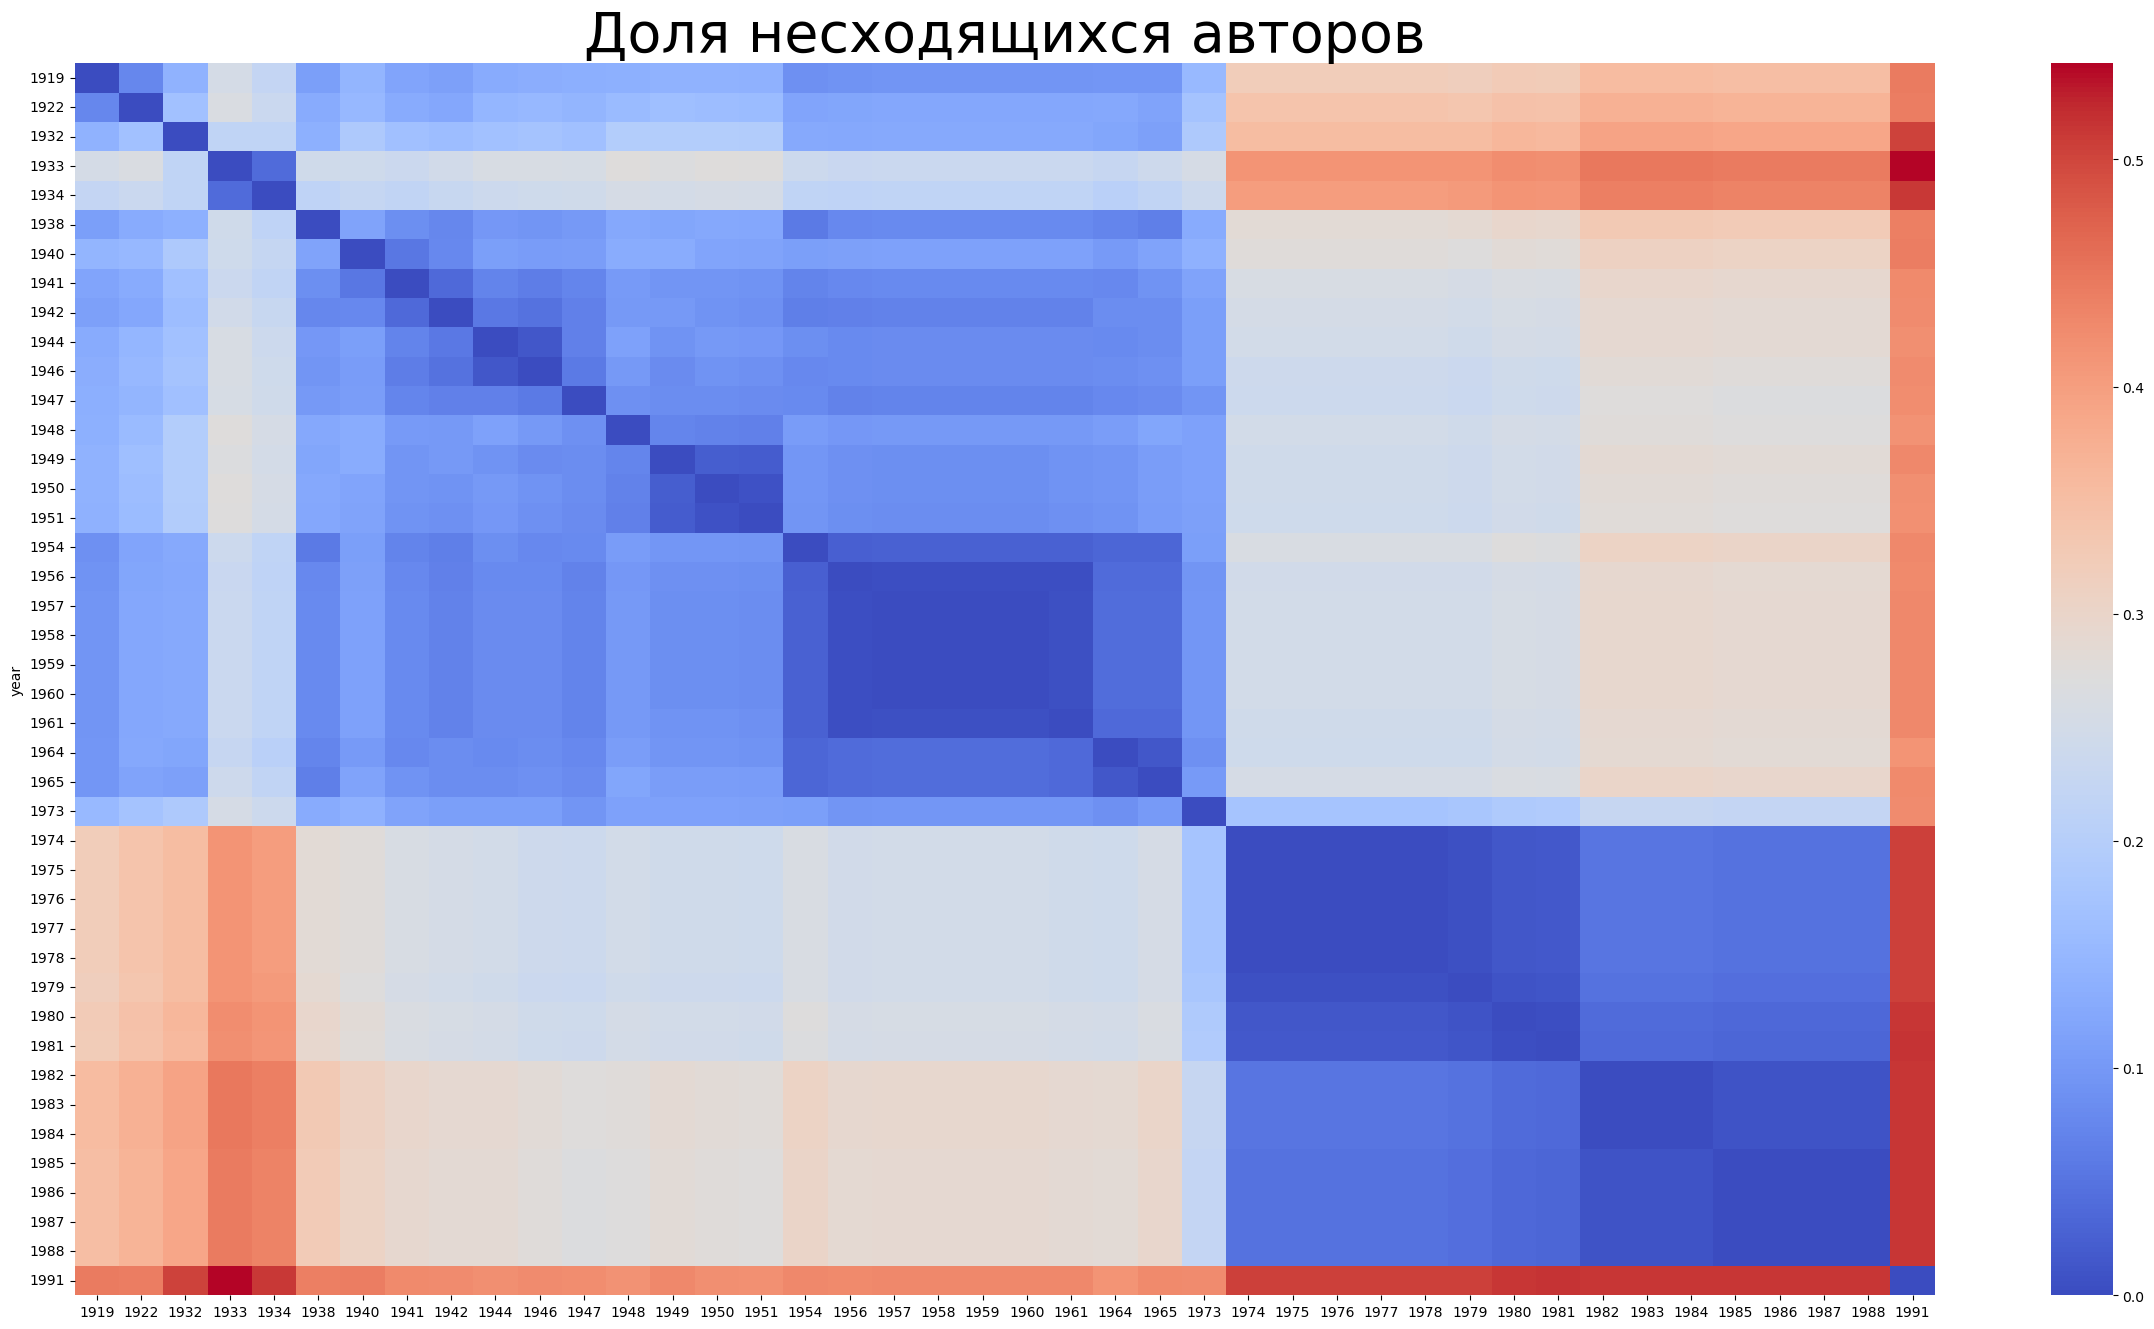

In [393]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 16))
plt.title('Доля несходящихся авторов', fontsize = 40)
sns.heatmap(dataf, cmap='coolwarm')

In [401]:
dataf2

,1919,1922,1932,1933,1934,1938,1940,1941,1942,1944,...,1980,1981,1982,1983,1984,1985,1986,1987,1988,1991
year,,,,,,,,,,,,,,,,,,,,,
1919,0.000000,1.316703,3.123644,2.535792,3.017354,2.893709,4.522777,4.264642,4.186551,1.772234,...,3.156182,3.110629,3.006508,3.006508,3.006508,3.036876,3.036876,3.036876,3.036876,3.770065
1922,1.316703,0.000000,0.835141,1.277657,1.245119,1.091106,5.783080,3.477223,3.273319,1.982646,...,1.774403,1.711497,1.650759,1.650759,1.650759,1.702820,1.702820,1.702820,1.702820,2.915401
1932,3.123644,0.835141,0.000000,0.865510,0.689805,0.297180,6.733189,2.869848,2.633406,1.668113,...,0.947939,0.878525,0.787419,0.787419,0.787419,0.789588,0.789588,0.789588,0.789588,1.787419
1933,2.535792,1.277657,0.865510,0.000000,1.041215,0.691974,5.581345,2.295011,2.262473,1.806941,...,2.067245,2.008677,1.735358,1.733189,1.735358,1.778742,1.778742,1.778742,1.778742,3.229935
1934,3.017354,1.245119,0.689805,1.041215,0.000000,0.765727,9.008677,4.722343,4.342733,3.297180,...,1.924078,1.841649,1.503254,1.503254,1.503254,1.550976,1.550976,1.550976,1.550976,4.216920
1938,2.893709,1.091106,0.297180,0.691974,0.765727,0.000000,6.275488,2.362256,2.017354,1.201735,...,0.581345,0.537961,0.383948,0.383948,0.383948,0.357918,0.357918,0.357918,0.357918,1.594360
1940,4.522777,5.783080,6.733189,5.581345,9.008677,6.275488,0.000000,1.893709,2.885033,1.722343,...,5.611714,5.689805,5.904555,5.904555,5.904555,5.841649,5.841649,5.841649,5.841649,4.581345
1941,4.264642,3.477223,2.869848,2.295011,4.722343,2.362256,1.893709,0.000000,0.390456,0.416486,...,1.963124,2.015184,2.099783,2.101952,2.099783,2.043384,2.043384,2.043384,2.043384,1.470716
1942,4.186551,3.273319,2.633406,2.262473,4.342733,2.017354,2.885033,0.390456,0.000000,0.188720,...,2.164859,2.212581,2.167028,2.177874,2.167028,2.132321,2.132321,2.132321,2.132321,1.550976


<AxesSubplot:title={'center':'Доля несходящихся авторов'}, ylabel='year'>

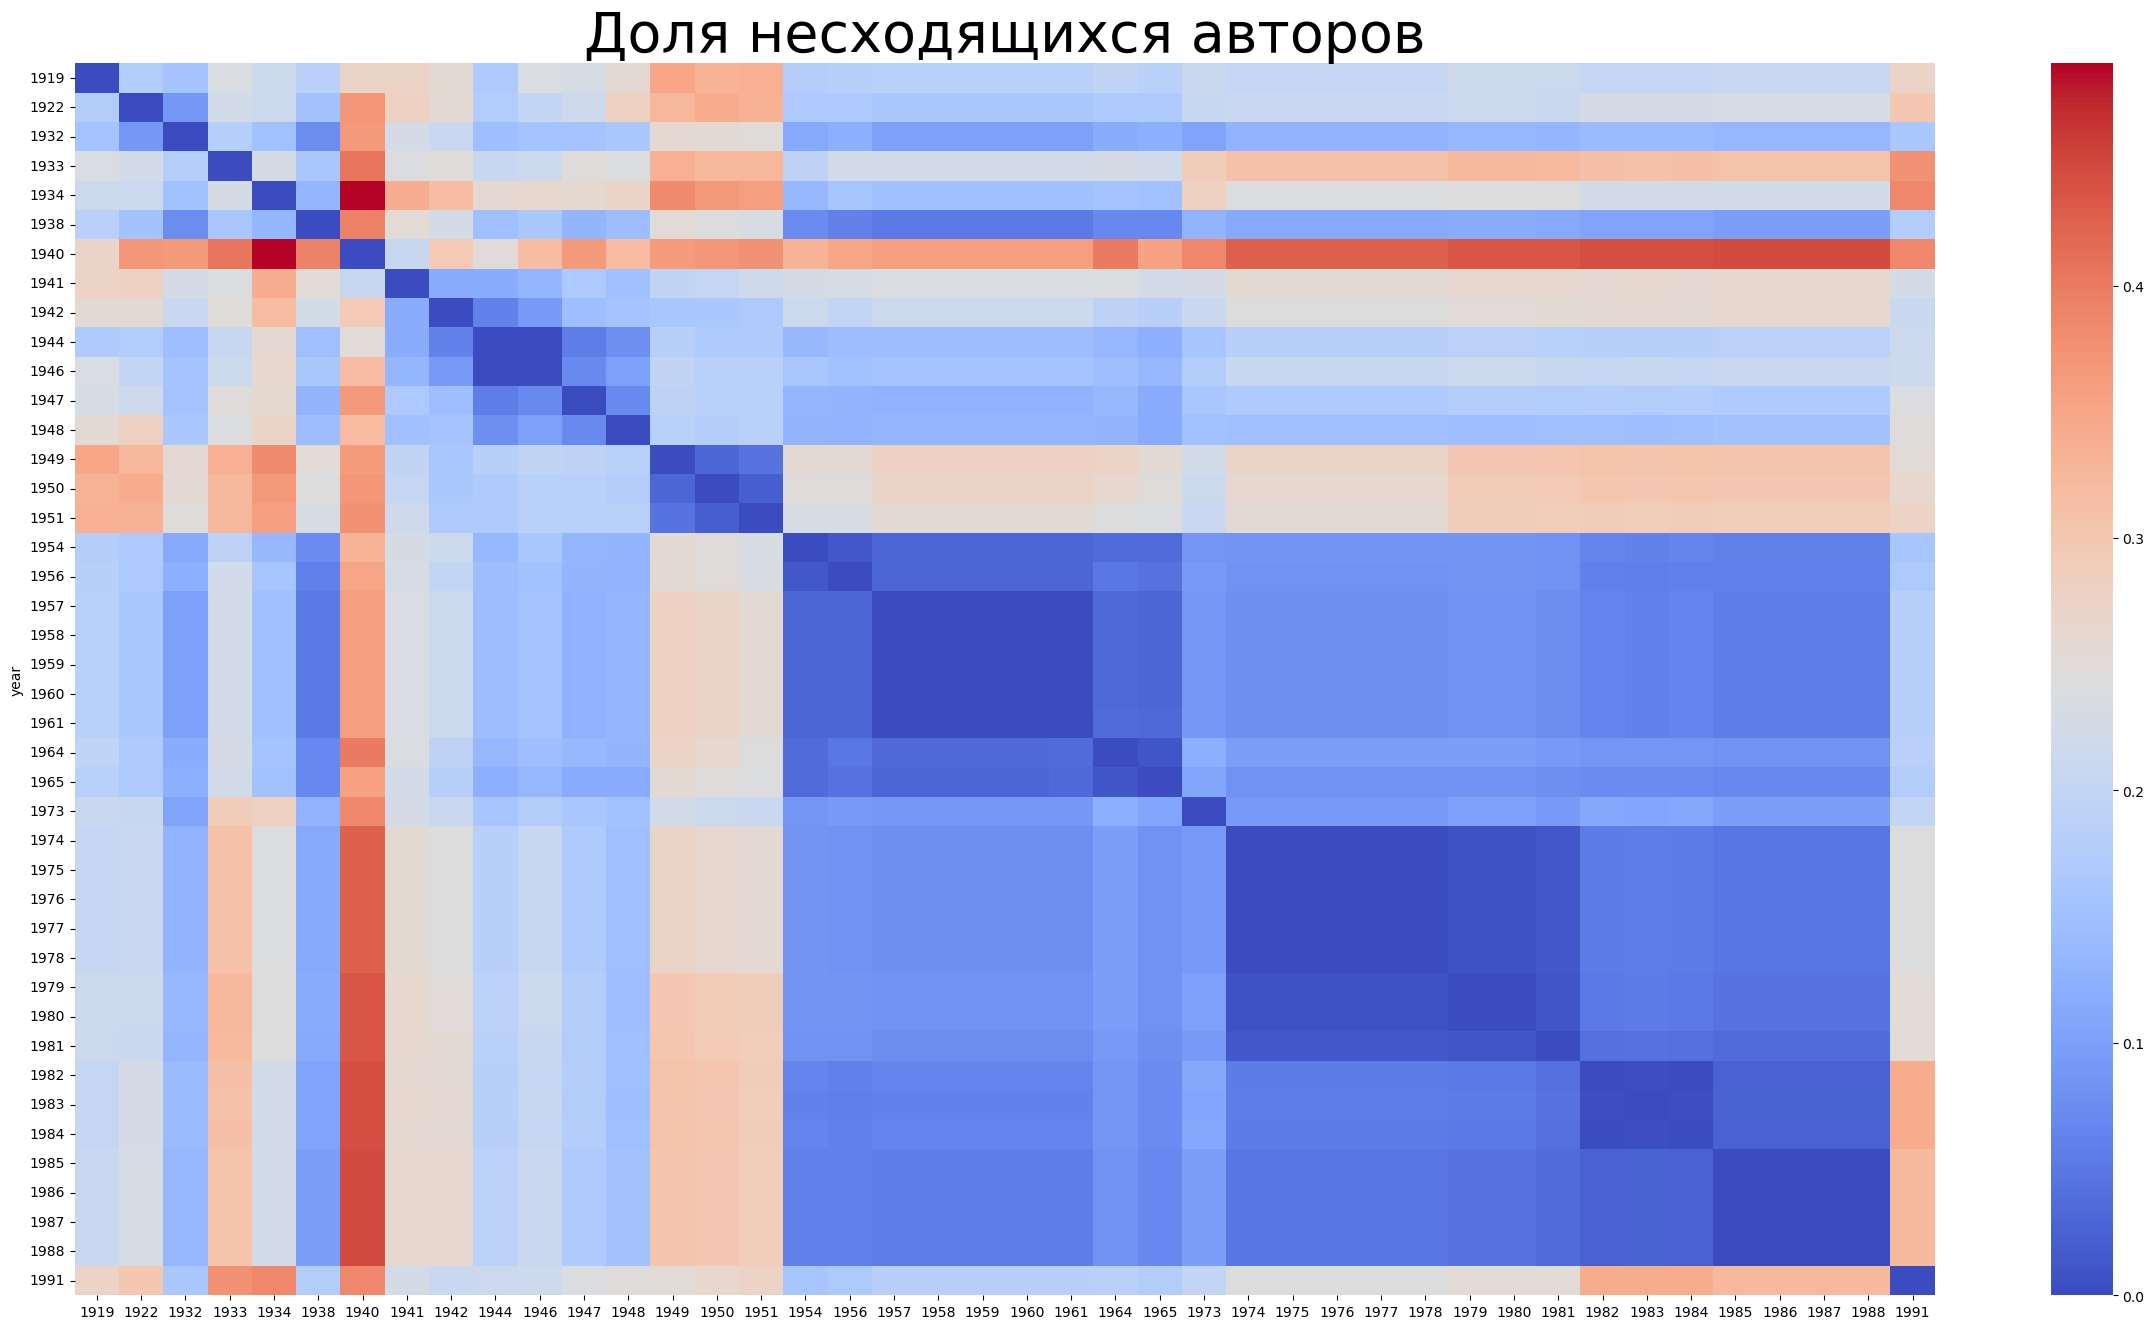

In [406]:
plt.figure(figsize=(30, 16))
plt.title('Доля несходящихся авторов', fontsize = 40)
sns.heatmap(dataf2, cmap='coolwarm')

In [263]:
pd.set_option('display.max_rows', 25)

<AxesSubplot:title={'center':'Доля несходящихся произведений'}, ylabel='year'>

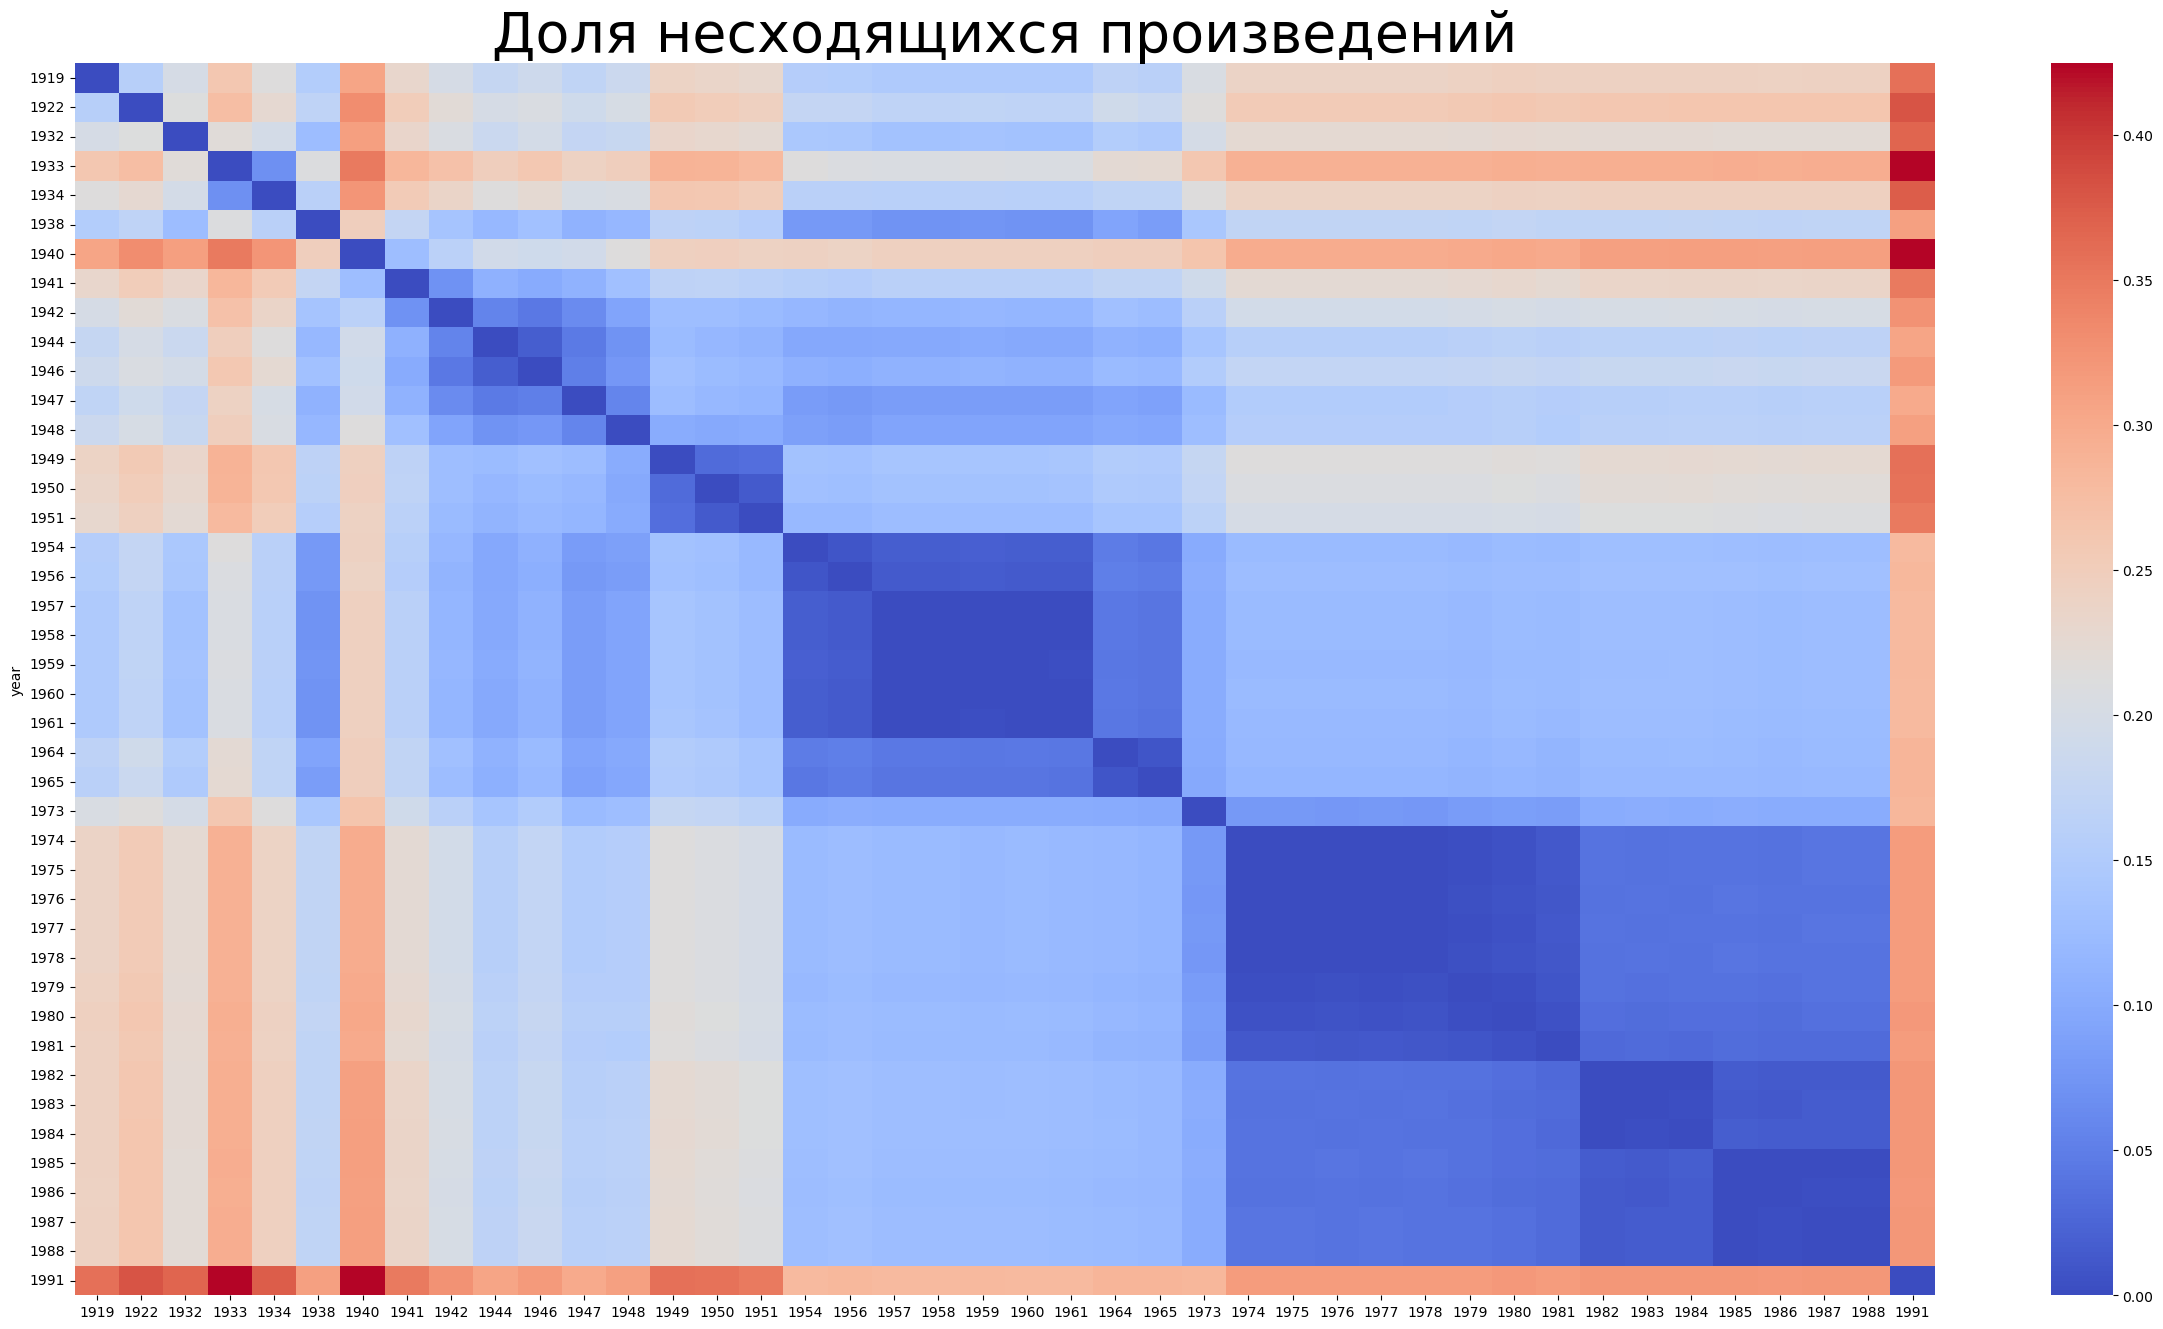

In [395]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 16))
plt.title('Доля несходящихся произведений', fontsize = 40)
sns.heatmap(dataf1, cmap='coolwarm')

In [322]:
pd.set_option('display.max_rows', 2500)
p_1947 = pivot_df1[1947]
p_1948 = pivot_df1[1948]
d_1947 = pivot_df[1947]
d_1948 = pivot_df[1948]

In [314]:
pros = df_del.merge(pd.DataFrame(p_1947).reset_index().merge(pd.DataFrame(p_1948).reset_index()))
pros

,Unnamed: 0,author,title,comment,curriculum,id,year,grade,priority,1947,1948
0,0,Андреев Л.Н.,Жили-были,NaN,19 ИРЛ 2 ст,1,1919,9,NaN,0,0
1,1,Андреев Л.Н.,Иуда,NaN,19 ИРЛ 2 ст,1,1919,9,NaN,0,0
2,2,Андреев Л.Н.,Рассказ о семи повешенных,NaN,19 ИРЛ 2 ст,1,1919,9,*,0,0
3,5,Герцен А.И.,Кто виноват?,NaN,19 ИРЛ 2 ст,1,1919,8,NaN,0,1
4,6,Гоголь Н.В.,Вечера на Хуторе близ Диканьки,NaN,19 ИРЛ 2 ст,1,1919,8,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...
7853,10301,Шиллер Ф.,Разбойники,NaN,91 ПСОУЗ,50,1991,9,NaN,0,0
7854,10302,Эсхил,Прометей прикованный,NaN,91 ПСОУЗ,50,1991,9,NaN,0,0
7855,10303,Достоевский Ф.М.,Преступление и наказание,NaN,91 ПСОУЗ,50,1991,10,NaN,0,0
7856,10304,Куприн А.И.,Гранатовый браслет,NaN,91 ПСОУЗ,50,1991,11,*,0,0


In [325]:
d_1948 = pd.DataFrame(d_1948).reset_index()
d_1948.rename(columns={1948: 'au_48'}, inplace = True)

In [339]:
pivot_df.to_csv('pivot.csv')

In [338]:
pros = pros.merge(d_1948.merge(d_1947))
pros.to_csv('1947-48.csv')

In [334]:
(pros.merge(d_1948.merge(d_1947))).to_csv('1947-48')

In [323]:
d_1947 = pd.DataFrame(d_1947).reset_index()
d_1947.rename(columns={1947: 'au_47'}, inplace = True)

In [345]:
df_del[df_del['author'] == 'Шаламов В.Т.']

,Unnamed: 0,author,title,comment,curriculum,id,year,grade,priority
9316,10285,Шаламов В.Т.,NaN,NaN,91 ПСОУЗ,50,1991,11,*


In [363]:
df_del['title'] = df_del['title'].fillna('что-то')

In [364]:
pivot_df = df_del.pivot_table(index='author', columns='year', values='title', aggfunc='count')
for i in pivot_df.columns:
    pivot_df[i] = pivot_df[i].apply(lambda x: 1 if x > 0 else 0)

In [365]:
pivot_df[pivot_df.index == 'Шаламов В.Т.']

year,1919,1922,1932,1933,1934,1938,1940,1941,1942,1944,...,1980,1981,1982,1983,1984,1985,1986,1987,1988,1991
author,,,,,,,,,,,,,,,,,,,,,
Шаламов В.Т.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [367]:
pivot_df.to_csv('pivot_df.csv')